In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt

In [9]:
#reading file
df=pd.read_csv('data.csv')
X=df
X

,PetalLength,SepalLength
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,6.0,5.1
6,5.4,4.5
7,6.0,4.5
8,6.7,4.7
9,6.3,4.4


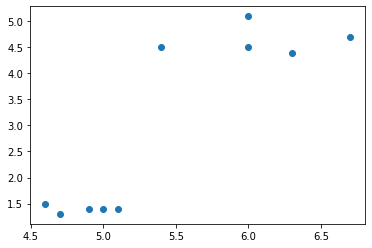

In [4]:
#plot on scatters
plt.scatter(df['PetalLength'],df['SepalLength'])


In [11]:
K=2
Centroids=(X.sample(n=K))
Centroids

,PetalLength,SepalLength
3,4.6,1.5
4,5.0,1.4


Text(0, 0.5, 'SepalLength')

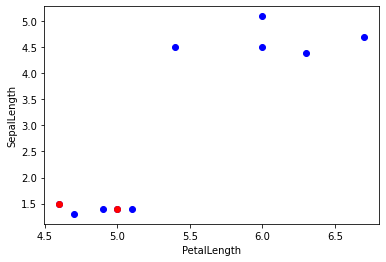

In [13]:
plt.scatter(X["PetalLength"],X["SepalLength"],c="blue")
plt.scatter(Centroids["PetalLength"],Centroids["SepalLength"],c="red")
plt.xlabel("PetalLength")
plt.ylabel("SepalLength")

In [14]:
diff=1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["PetalLength"]-row_d["SepalLength"])**2
            d2=(row_c["PetalLength"]-row_d["SepalLength"])**2
            d=sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    X["Clust"]=C
    Centroids_new=X.groupby(["Clust"]).mean()[["SepalLength","PetalLength"]]
    if j== 0:
        diff= 1
        j=j+1
    else:
        diff=(Centroids_new['SepalLength']-Centroids['SepalLength']).sum()+(Centroids_new['PetalLength']-Centroids['PetalLength']).sum()
        print(diff.sum())
    Centroids=X.groupby(["Clust"]).mean()[["SepalLength","PetalLength"]]

0.29000000000000004
0.0


In [15]:
Centroids

,SepalLength,PetalLength
Clust,,
1,3.02,5.47


Text(0, 0.5, 'SepalLength')

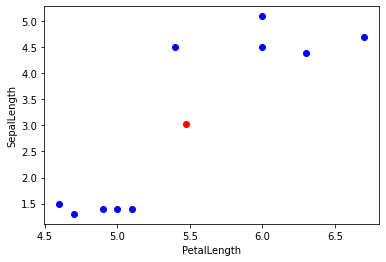

In [16]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Clust"]==k+1]
    plt.scatter(data["PetalLength"],data["SepalLength"],c=color[k])
plt.scatter(Centroids["PetalLength"],Centroids["SepalLength"],c='red')
plt.xlabel("PetalLength")
plt.ylabel("SepalLength")